In [2]:
import pandas as pd

df_heart = pd.read_csv('../data_root/heart_attack_prediction_dataset.csv')
df_heart.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [3]:
# Separando a coluna 'Blood Pressure' em duas colunas: 'Systolic' e 'Diastolic'
df_heart[['Systolic', 'Diastolic']] = df_heart['Blood Pressure'].str.split('/', expand=True)

# Convertendo as colunas para tipo inteiro, se necessário
df_heart['Systolic'] = df_heart['Systolic'].astype(int)
df_heart['Diastolic'] = df_heart['Diastolic'].astype(int)

print(df_heart[['Systolic', 'Diastolic']].head())

   Systolic  Diastolic
0       158         88
1       165         93
2       174         99
3       163        100
4        91         88


In [4]:

# Criando novas features 

# 1. Índice de Risco Cardíaco
df_heart['Cardiac_Risk_Index'] = (
    0.4 * df_heart['Cholesterol'] + 
    0.3 * df_heart['Triglycerides'] + 
    0.2 * df_heart['BMI'] + 
    0.1 * (df_heart['Systolic'] + df_heart['Diastolic'])
)

# 2. Classificação do IMC
def classificar_bmi(bmi):
    if bmi < 18.5:
        return 'Abaixo do Peso'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Sobrepeso'
    else:
        return 'Obesidade'

df_heart['BMI_Category'] = df_heart['BMI'].apply(classificar_bmi)

# 3. Estilo de Vida Saudável
df_heart['Healthy_Lifestyle'] = (
    (df_heart['Exercise Hours Per Week'] >= 3) & 
    (df_heart['Sleep Hours Per Day'] >= 7) & 
    (df_heart['Alcohol Consumption'] == 0)
).astype(int)

# 4. Pressão Arterial Média
df_heart['Mean_Blood_Pressure'] = (df_heart['Systolic'] + df_heart['Diastolic']) / 2

# 5. Idade em Faixas
def categorizar_idade(age):
    if age < 30:
        return 'Jovem'
    elif 30 <= age < 60:
        return 'Adulto'
    else:
        return 'Idoso'

df_heart['Age_Group'] = df_heart['Age'].apply(categorizar_idade)

# Verificando as novas features criadas
print(df_heart[['Age', 'BMI', 'Cardiac_Risk_Index', 'Healthy_Lifestyle', 'BMI_Category', 'Mean_Blood_Pressure', 'Age_Group']].head())

   Age        BMI  Cardiac_Risk_Index  Healthy_Lifestyle BMI_Category  \
0   67  31.251233          199.850247                  0    Obesidade   
1   21  27.194973          257.338995                  0    Sobrepeso   
2   21  28.176571          338.635314                  0    Sobrepeso   
3   84  36.464704          300.192941                  0    Obesidade   
4   66  21.809144          218.761829                  0       Normal   

   Mean_Blood_Pressure Age_Group  
0                123.0     Idoso  
1                129.0     Jovem  
2                136.5     Jovem  
3                131.5     Idoso  
4                 89.5     Idoso  


C:\Users\Calebe\AppData\Local\Temp\ipykernel_13592\3747027855.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI_Category', data=df_heart, palette='viridis')
C:\Users\Calebe\AppData\Local\Temp\ipykernel_13592\3747027855.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Healthy_Lifestyle', data=df_heart, palette='coolwarm')
C:\Users\Calebe\AppData\Local\Temp\ipykernel_13592\3747027855.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df_heart, palette='muted')


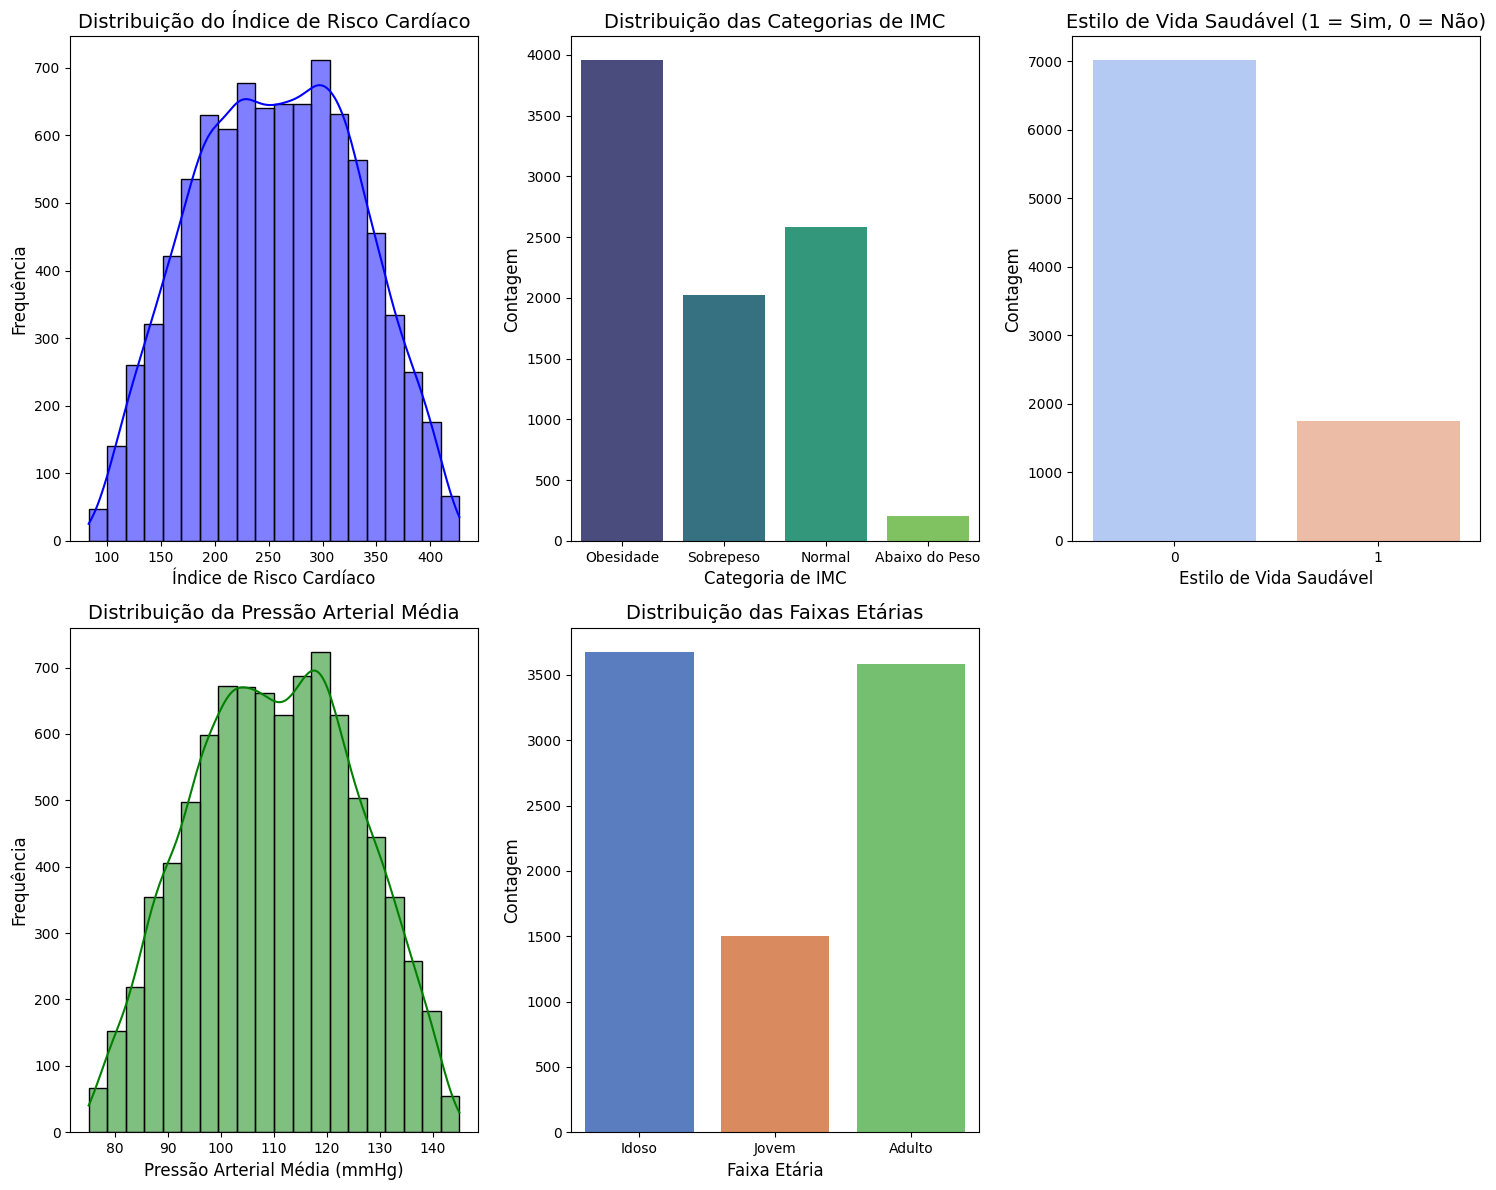

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustando o tamanho da figura
plt.figure(figsize=(15, 12))

# 1. Histograma do Índice de Risco Cardíaco
plt.subplot(2, 3, 1)
sns.histplot(df_heart['Cardiac_Risk_Index'], kde=True, color='blue', bins=20)
plt.title('Distribuição do Índice de Risco Cardíaco', fontsize=14)
plt.xlabel('Índice de Risco Cardíaco', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# 2. Contagem das Categorias de IMC
plt.subplot(2, 3, 2)
sns.countplot(x='BMI_Category', data=df_heart, palette='viridis')
plt.title('Distribuição das Categorias de IMC', fontsize=14)
plt.xlabel('Categoria de IMC', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# 3. Distribuição do Estilo de Vida Saudável
plt.subplot(2, 3, 3)
sns.countplot(x='Healthy_Lifestyle', data=df_heart, palette='coolwarm')
plt.title('Estilo de Vida Saudável (1 = Sim, 0 = Não)', fontsize=14)
plt.xlabel('Estilo de Vida Saudável', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# 4. Histograma da Pressão Arterial Média
plt.subplot(2, 3, 4)
sns.histplot(df_heart['Mean_Blood_Pressure'], kde=True, color='green', bins=20)
plt.title('Distribuição da Pressão Arterial Média', fontsize=14)
plt.xlabel('Pressão Arterial Média (mmHg)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# 5. Contagem das Faixas Etárias
plt.subplot(2, 3, 5)
sns.countplot(x='Age_Group', data=df_heart, palette='muted')
plt.title('Distribuição das Faixas Etárias', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Ajustando o layout
plt.tight_layout()
plt.show()


In [8]:
df_heart.to_csv('df_heart_modified.csv', index=False)

In [10]:
df_heart.to_csv('C:/Users/Calebe/Documents/df_heart_modified.csv', index=False)